Car Price Prediction Using Machine Learning

1.Setup & Imports

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


2. Load and Inspect Data

In [3]:
# Load dataset (replace with actual file path)
df = pd.read_csv('car data.csv')

# Display first few rows and info
print(df.head())
print(df.info())


FileNotFoundError: [Errno 2] No such file or directory: 'car data.csv'

3. Data Preprocessing


3.1 Create Derived Features


In [ ]:

df['Car_Age'] = 2025 - df['Year']

# Drop 'Car_Name' as it doesn't numerically affect price
df.drop(['Car_Name'], axis=1, inplace=True)


3.2 Handle Categorical Variables

In [ ]:

df = pd.get_dummies(df, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)


3.3: Scale numeric features

In [ ]:

scaler = StandardScaler()
num_cols = ['Present_Price', 'Driven_kms', 'Car_Age']
df[num_cols] = scaler.fit_transform(df[num_cols])


4. Define Features and Target

In [ ]:
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

5. Split Data into Training & Testing Sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

6. Model Training

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


7. Model Evaluation


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Predictions
y_pred = model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)       # Manually compute RMSE
r2 = r2_score(y_test, y_pred)

print("📊 Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.3f}")



📊 Model Performance:
Mean Absolute Error (MAE): 0.60
Root Mean Squared Error (RMSE): 0.90
R² Score: 0.965


Visualization: Actual vs Predicted Prices

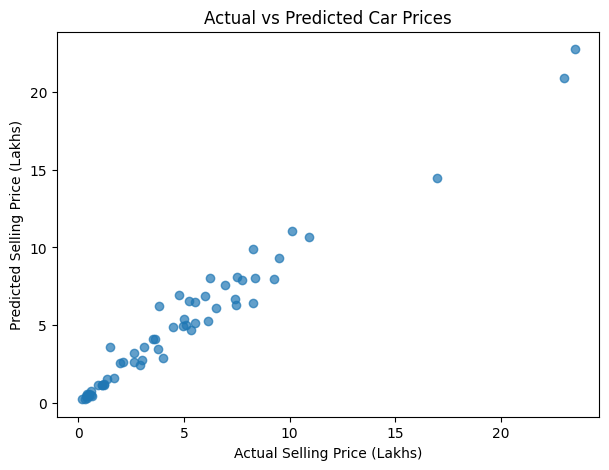

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Selling Price (Lakhs)")
plt.ylabel("Predicted Selling Price (Lakhs)")
plt.title("Actual vs Predicted Car Prices")
plt.show()


8. Feature Importance Analysis

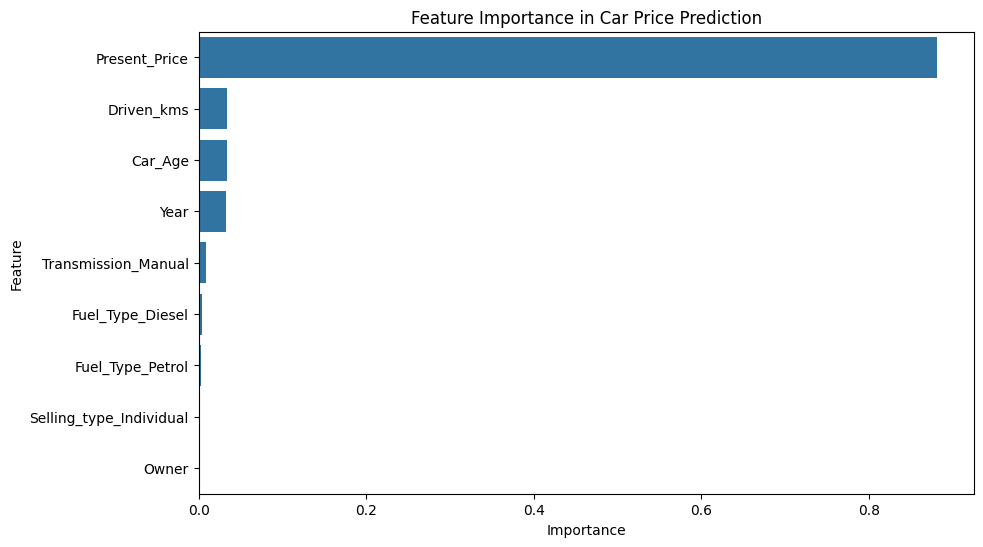


Top Influential Features:
               Feature  Importance
1        Present_Price    0.880961
2           Driven_kms    0.034180
4              Car_Age    0.034003
0                 Year    0.032799
8  Transmission_Manual    0.009122


In [ ]:
# Step 8: Feature importance
importances = model.feature_importances_
features = X.columns

feature_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_imp_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df)
plt.title("Feature Importance in Car Price Prediction")
plt.show()

print("\nTop Influential Features:")
print(feature_imp_df.head(5))


9. Insights & Interpretation


In [ ]:
print("\n💡 Key Business Insights:")
if 'Present_Price' in feature_imp_df.iloc[0]['Feature']:
    print("➡️ Present car price (new value) is the strongest predictor of selling price.")
if 'Car_Age' in feature_imp_df['Feature'].values:
    print("➡️ Older cars generally have lower resale values.")
if 'Driven_kms' in feature_imp_df['Feature'].values:
    print("➡️ More kilometers driven reduces the resale price.")
if 'Fuel_Type_Diesel' in feature_imp_df['Feature'].values:
    print("➡️ Diesel cars often have higher resale value compared to petrol cars.")



💡 Key Business Insights:
➡️ Present car price (new value) is the strongest predictor of selling price.
➡️ Older cars generally have lower resale values.
➡️ More kilometers driven reduces the resale price.
➡️ Diesel cars often have higher resale value compared to petrol cars.


In [ ]:
import joblib

# Save trained model
joblib.dump(model, 'car_price_prediction_model.pkl')

# To load later:
# model = joblib.load('car_price_prediction_model.pkl')


NameError: name 'model' is not defined